In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_context("notebook", font_scale=0.75)

In [2]:
df = pd.concat([
    pd.read_json("../../out/2023-05-quantisation/baselines.jsonl", lines=True),
    pd.read_json("../../out/2023-05-quantisation/pythia.jsonl", lines=True),
    pd.read_json("../../out/2023-05-quantisation/optmpt.jsonl", lines=True),
]).reset_index()
df = df[~df["model"].isna()]  # failed run

df["model"] = df["model"].apply(lambda s: s.split("/")[1])
df["model_family"] = df["model"].apply(lambda s: s.split("-")[0])
df["model_scale"] = df["model"].apply(lambda s: s.split("-")[1])
df["format"] = df.apply(lambda s: "FP32" if s.quantisation_mode=="none" else f"E{int(s.exponent_bits)}M{int(s.mantissa_bits)}", axis=1)
df = df.rename(columns={c: dict(outcompare="oc", arc_easy="arc", lambada_openai="lam")[c.split(":")[0]] + "_" + c.split(":")[1] for c in df.columns if ":" in c})

print("Rows", len(df))
# display(list(df.columns))
display(df.groupby(["model"])["model"].count())

Rows 191


model
opt-1.3b       17
opt-125m       17
opt-2.7b       17
opt-6.7b       17
pythia-1.4b    17
pythia-12b      4
pythia-160m    17
pythia-1b      17
pythia-2.8b    17
pythia-410m    17
pythia-6.9b    17
pythia-70m     17
Name: model, dtype: int64

# Exploration

In [3]:
df[df.model == "pythia-2.8b"].sort_values("oc_entropy_rmse")[["format", "quantisation_mode", "oc_exact_match_length", "oc_entropy_rmse", "arc_acc", "lam_acc"]]

,format,quantisation_mode,oc_exact_match_length,oc_entropy_rmse,arc_acc,lam_acc
5,FP32,none,64.000000,0.000000,0.643519,0.646614
98,E2M5,output,45.943333,0.017610,0.643519,0.647972
99,E2M5,inout,44.183334,0.021283,0.641414,0.647584
94,E0M7,output,38.246666,0.024166,0.643519,0.646808
100,E3M4,tensor,39.660000,0.027925,0.643519,0.646614
102,E3M4,output,37.826668,0.028144,0.640152,0.644867
103,E3M4,inout,36.443333,0.028360,0.640152,0.646808
101,E3M4,input,37.240002,0.029358,0.642256,0.648942
97,E2M5,input,34.613335,0.033111,0.644781,0.646031
95,E0M7,inout,31.580000,0.037013,0.644781,0.643121


In [4]:
(df
 .sort_values("parameters")
 .groupby("model", sort=False).apply(lambda s: s.sort_values("oc_exact_match_length", ascending=False)[:5])
 [["format", "quantisation_mode", "oc_exact_match_length", "oc_entropy_rmse", "arc_acc", "lam_acc"]])

format quantisation_mode  oc_exact_match_length   
model                                                             
pythia-70m  0     FP32              none              64.000000  \
            14    E0M7            output              14.203333   
            18    E2M5            output               9.516666   
            15    E0M7             inout               6.626667   
            19    E2M5             inout               5.740000   
opt-125m    7     FP32              none              63.610001   
            135   E2M5             inout              44.463333   
            134   E2M5            output              43.946667   
            133   E2M5             input              41.173332   
            139   E3M4             inout              39.646667   
pythia-160m 1     FP32              none              64.000000   
            30    E0M7            output              15.083333   
            34    E2M5            output              11.310000   
            35    E2M5             inout               8.993333   
            31    E0M7             inout               7.643333   
pythia-410m 2     FP32              none              64.000000   
            50    E2M5            output              37.369999   
            46    E0M7            output              31.313334   
            51    E2M5             inout              26.086666   
            55    E3M4             inout              25.299999   
pythia-1b   3     FP32              none              64.000000   
            67    E2M5             inout              41.703335   
            66    E2M5            output              41.360001   
            62    E0M7            output              39.236668   
            70    E3M4            output              38.290001   
opt-1.3b    8     FP32              none              63.619999   
            149   E2M5             input              49.570000   
            151   E2M5             inout              47.703335   
            150   E2M5            output              45.793335   
            154   E3M4            output              43.023335   
pythia-1.4b 4     FP32              none              64.000000   
            82    E2M5            output              43.763332   
            83    E2M5             inout              39.833332   
            78    E0M7            output              37.389999   
            87    E3M4             inout              34.910000   
opt-2.7b    9     FP32              none              63.503334   
            165   E2M5             input              48.326668   
            167   E2M5             inout              48.049999   
            166   E2M5            output              46.846668   
            171   E3M4             inout              42.903332   
pythia-2.8b 5     FP32              none              64.000000   
            98    E2M5            output              45.943333   
            99    E2M5             inout              44.183334   
            100   E3M4            tensor              39.660000   
            94    E0M7            output              38.246666   
opt-6.7b    10    FP32              none              64.000000   
            183   E2M5             inout              50.536667   
            181   E2M5             input              50.436668   
            182   E2M5            output              48.353333   
            177   E0M7             input              45.740002   
pythia-6.9b 6     FP32              none              64.000000   
            114   E2M5            output              44.376667   
            116   E3M4            tensor              39.509998   
            117   E3M4             input              38.630001   
            119   E3M4             inout              38.410000   
pythia-12b  126   E0M7            output              37.990002   
            127   E0M7             inout              27.076666   
            125   E0M7             input              13.213333

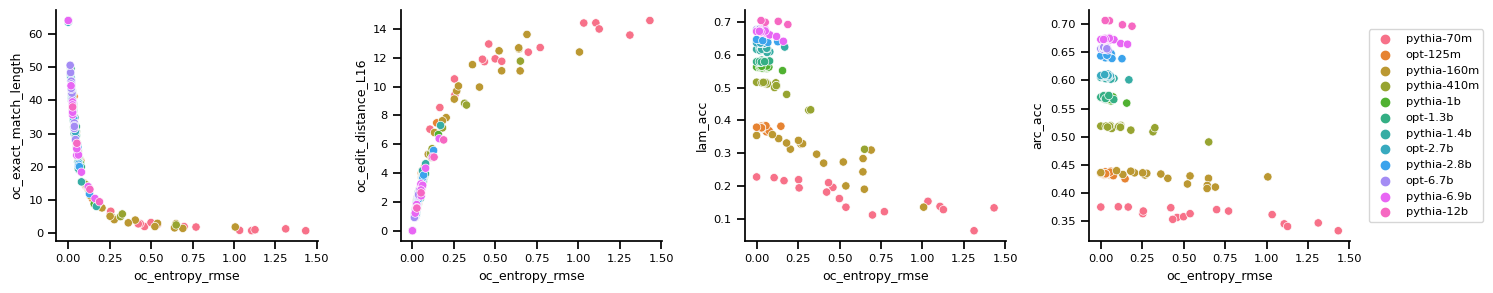

In [5]:
_, axs = plt.subplots(1, 4, figsize=(15, 3))
for ax, y in zip(axs, ["oc_exact_match_length", "oc_edit_distance_L16", "lam_acc", "arc_acc"]):
    sns.scatterplot(data=df.sort_values("parameters"), x="oc_entropy_rmse", hue="model", y=y, ax=ax)
    if ax is axs[-1]:
        plt.legend(loc="center left", bbox_to_anchor=(1.05, 0.5))
    else:
        ax.legend_.remove()
plt.tight_layout()
sns.despine()

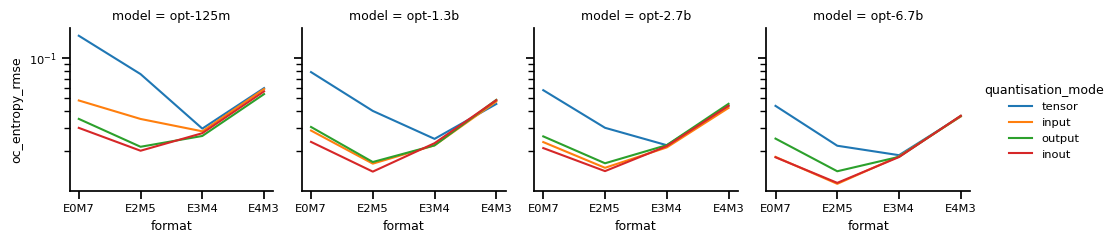

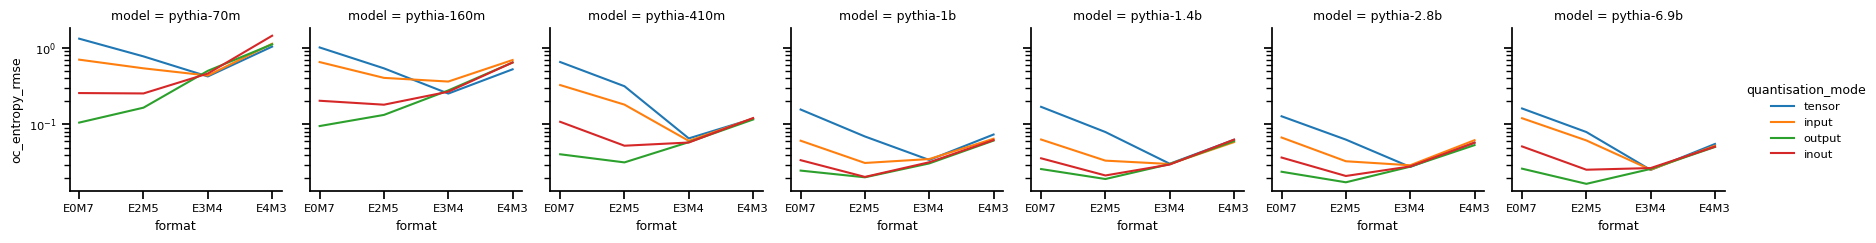

In [6]:
for _, g in df[(df.format != "FP32") & (df.model_scale != "12b")].groupby("model_family"):
    sns.relplot(data=g, y="oc_entropy_rmse", x="format", hue="quantisation_mode", col="model", kind="line", height=2.5)
    plt.yscale("log")
sns.despine()

# Results

## 1. 'Outcompare entropy RMSE' (`oc_entropy_rmse`) _somewhat_ predicts downstream performance (`lam_acc`, `arc_acc`)

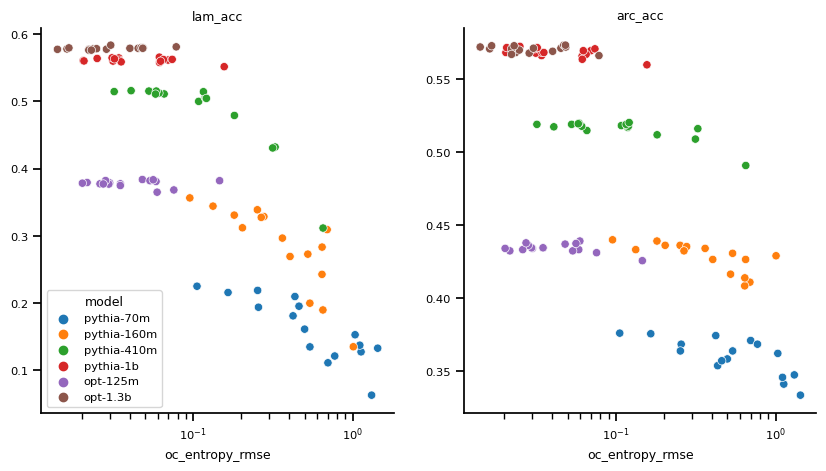

In [7]:
d = df[df["parameters"] < 1.4e9]
_, axs = plt.subplots(ncols=2, figsize=(10, 5))
for i, (y, ax) in enumerate(zip(["lam_acc", "arc_acc"], axs)):
    sns.scatterplot(data=d, y=y, x="oc_entropy_rmse", hue="model", ax=ax)
    ax.set_xscale("log")
    ax.set_ylabel("")
    ax.set_title(y)
    if i:
        ax.legend_.remove()
sns.despine()

## 2. The best overall was `(output-channels, E2M5)`, the best `per-tensor` scaling format was `E3M4`

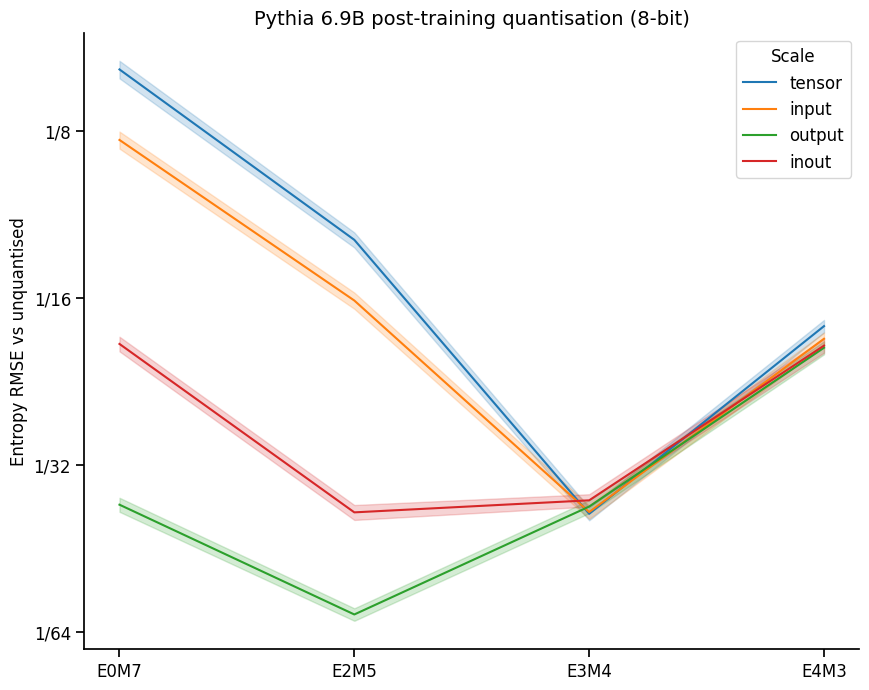

In [31]:
d = (df
     .pipe(lambda d: d[d["model"] == "pythia-6.9b"])
     .pipe(lambda d: d[d["quantisation_mode"] != "none"])
     )
plt.figure(figsize=(10, 8))
ax = plt.gca()
for (mode, g), hue in zip(d.groupby("quantisation_mode", sort=False), sns.color_palette()):
    v, stderr = g["oc_entropy_rmse"], g["oc_entropy_rmse_stderr"]
    ax.plot(g["format"], v, color=hue, label=mode)
    ax.fill_between(g["format"], v-2*stderr, v+2*stderr, color=hue, alpha=.2)
ax.tick_params(axis="both", which="major", labelsize=12)
ax.legend(title="Scale", fontsize=12, title_fontsize=12)
ax.set_yscale("log", base=2)
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, _: f"1/{1/x:.0f}"))
ax.set_ylabel(f"Entropy RMSE vs unquantised", fontsize=12)
ax.set_title("Pythia 6.9B post-training quantisation (8-bit)", fontsize=14)
sns.despine()

# 3. Smaller models were harder to quantise

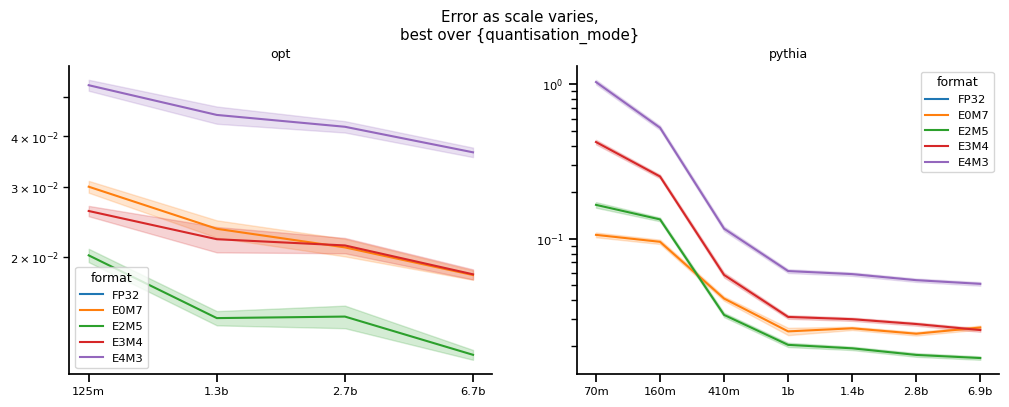

In [11]:
d = (df
     .pipe(lambda d: d[d.model_scale != "12b"])
     .groupby(["model", "format"], sort=False)
     .apply(lambda g: g.iloc[g["oc_entropy_rmse"].argmin()])
     .reset_index(drop=True))
for (family, gg), ax in zip(d.groupby("model_family"), plt.subplots(1, 2, figsize=(12, 4))[1]):
    for (name, g), hue in zip(gg.groupby("format", sort=False), sns.color_palette()):
        v, stderr = g["oc_entropy_rmse"], g["oc_entropy_rmse_stderr"]
        ax.plot(g["model_scale"], v, color=hue, label=name)
        ax.fill_between(g["model_scale"], v-2*stderr, v+2*stderr, color=hue, alpha=.2)
    ax.legend(title="format")
    ax.set_yscale("log")
    ax.set_title(family)
plt.suptitle("Error as scale varies,\nbest over {quantisation_mode}", y=1.02)
sns.despine()

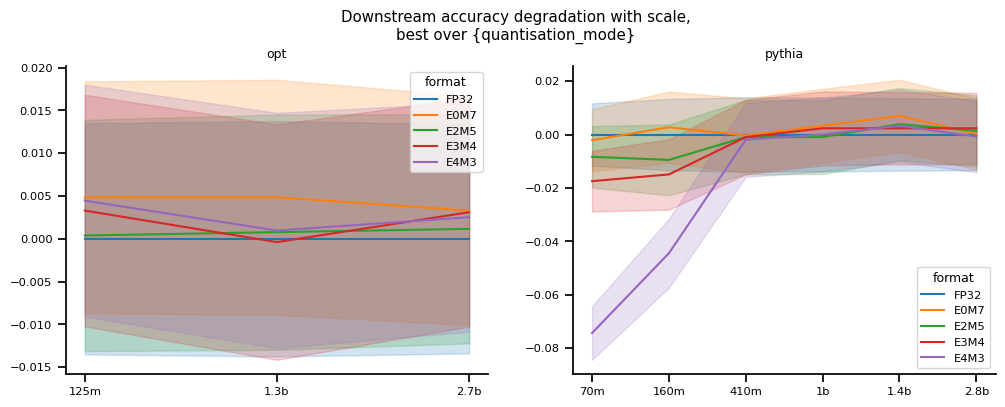

In [12]:
d = (df
     .pipe(lambda d: d[d.parameters < 2.9e9])
     .groupby(["model"], sort=False)
     .apply(lambda g: g.assign(lam_acc_delta=g["lam_acc"]-float(g[g["quantisation_mode"]=="none"]["lam_acc"].iloc[0])))
     .reset_index(drop=True)
     .groupby(["model", "format"], sort=False)
     .apply(lambda g: g.iloc[g["lam_acc_delta"].argmax()])
     .reset_index(drop=True)
     )
for (family, gg), ax in zip(d.groupby("model_family"), plt.subplots(1, 2, figsize=(12, 4))[1]):
    for (name, g), hue in zip(gg.groupby("format", sort=False), sns.color_palette()):
        v, stderr = g["lam_acc_delta"], g["lam_acc_stderr"]
        ax.plot(g["model_scale"], v, color=hue, label=name)
        ax.fill_between(g["model_scale"], v-2*stderr, v+2*stderr, color=hue, alpha=.2)
    ax.legend(title="format")
    ax.set_title(family)
plt.suptitle("Downstream accuracy degradation with scale,\nbest over {quantisation_mode}", y=1.02)
sns.despine()

## More results...

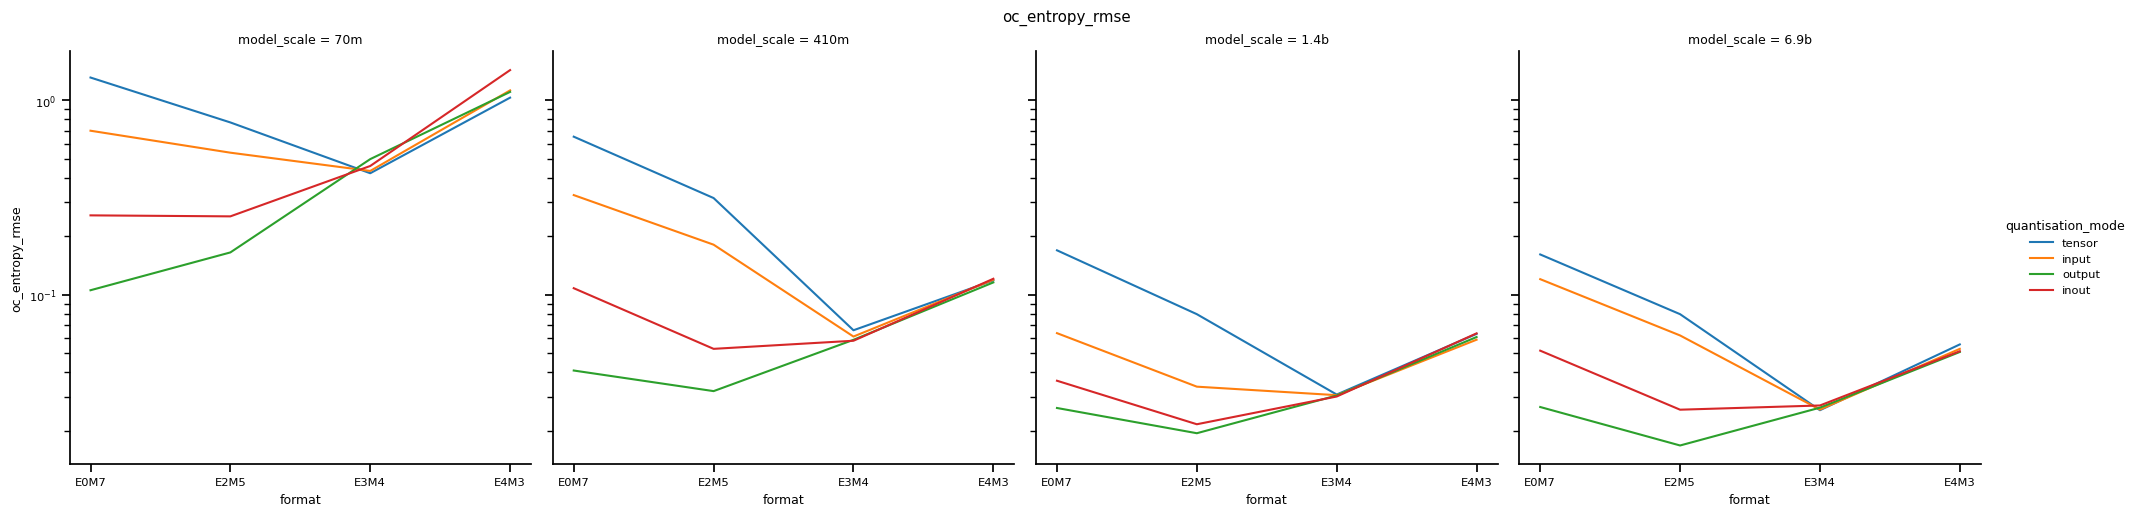

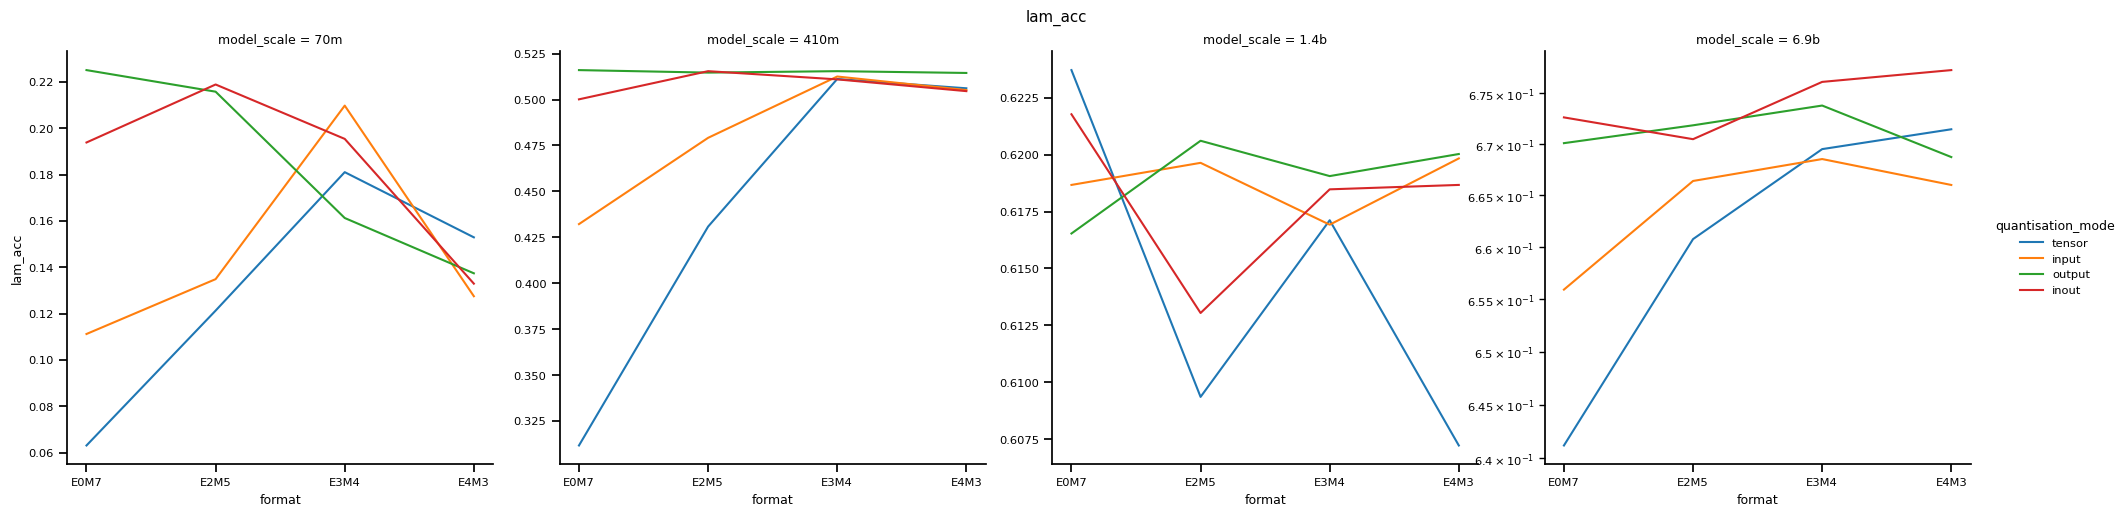

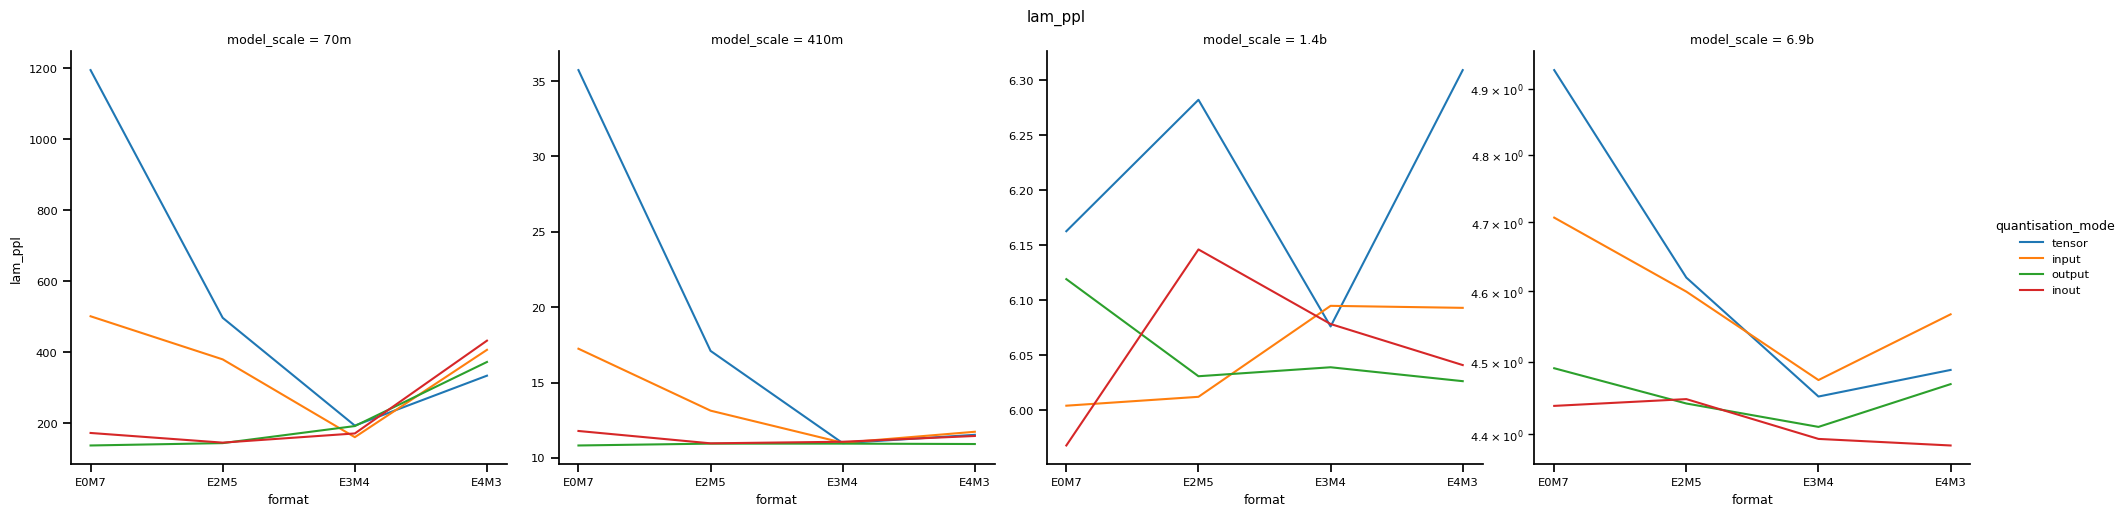

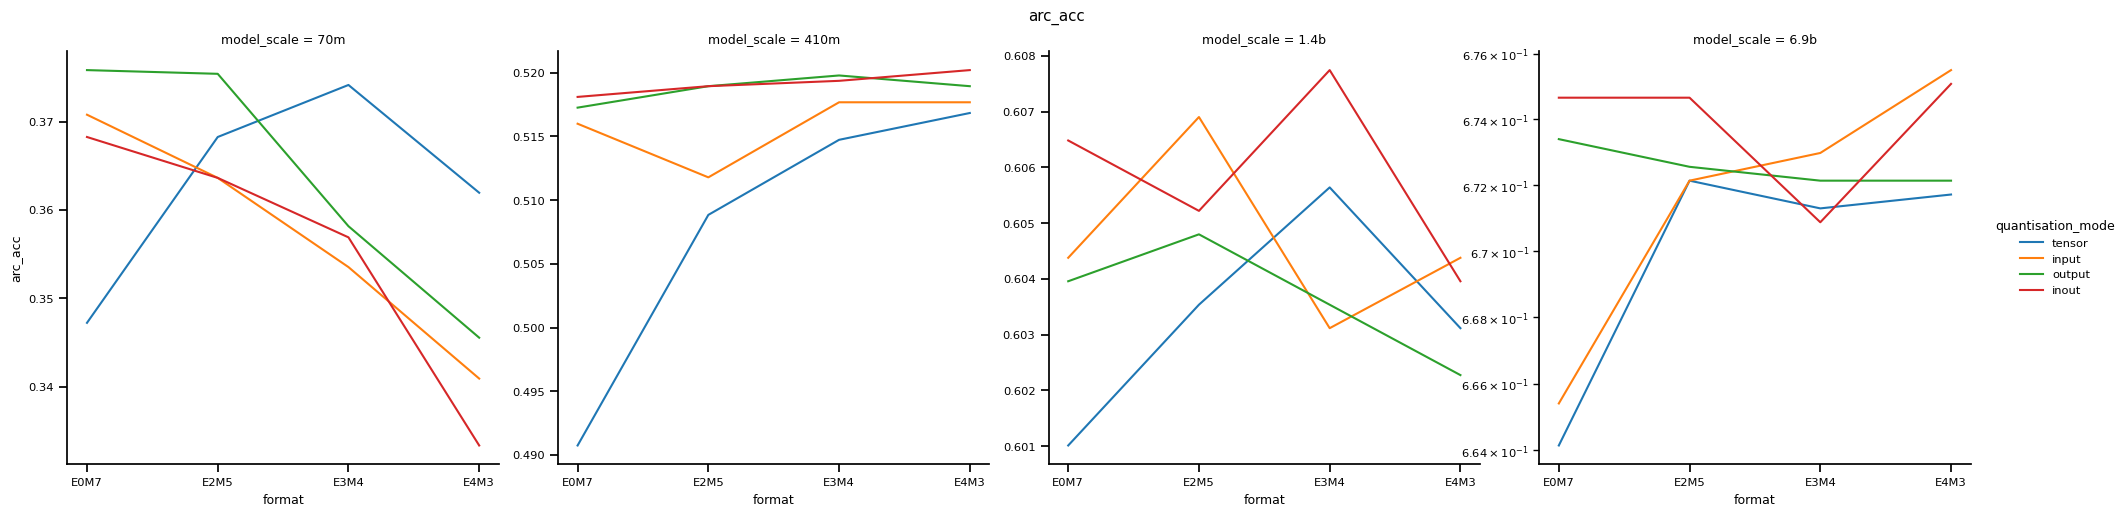

In [13]:
for y in ["oc_entropy_rmse", "lam_acc", "lam_ppl", "arc_acc"]:
     d = (df
          .pipe(lambda d: d[d.format != "FP32"])
          .pipe(lambda d: d[d.model_family == "pythia"])
          .pipe(lambda d: d[d.model_scale.isin(["70m", "410m", "1.4b", "6.9b"])])
          )
     sns.relplot(data=d, y=y, x="format", hue="quantisation_mode", col="model_scale", kind="line", facet_kws=dict(sharey=(y=="oc_entropy_rmse")))
     plt.yscale("log")
     plt.suptitle(y, y=1.02)